# TIM KOMPERDA
# CSC 580 Artificial Intelligence II, Winter 2025
# HW\#2 Cliffwalk


### 1. Install gymnasium and create a Cliff Walk environment

In [2]:
# Install gymnasium (in particular the toy-text subset)
!pip install gymnasium[toy-text]

In [3]:
import gymnasium as gym
import numpy as np

# Create a Cliff Walk environment using Gymnasium
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")#'ansi')#

# Reset the environment and display it
env.reset()

#print (env.render())  # textual output if mode == 'ansi' or 'human'
env.render() # gui/rgb output

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]

### 2. Inspect environment, transition probabilities and rewards

In [4]:
nS = env.observation_space.n    # number of states -- 48
nA = env.action_space.n         # number of actions -- four directions; 0:left, 1:down, 2:right, 3:up
print ("{}, {}".format(nS, nA))

48, 4


Transition probabilities, rewards and other info are stored a dictionary **env.P**.  You use state index (0-based) to access the info.  The tuple for each transition indicates (transition_probability, new_state, reward, terminated).

**IMPORTANT**: If you get an error "AttributeError: 'OrderEnforcing' object has no attribute 'P'", add a line to unwrap the environment and access P inside.  For example,

<pre># Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]</pre>

In [5]:
# Probatilies from State 0 (top-left corner).
#env.P[0]

# Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]

{0: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False)],
 1: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False)],
 2: [(0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False)],
 3: [(0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False)]}

In [6]:
# Probatilies from the start state (36)
env_unwrapped.P[36]

{0: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False)],
 1: [(0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False)],
 2: [(0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False)],
 3: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False)]}

In [7]:
# Transition probability for trying to go left (action 3) from the start state (36)
env_unwrapped.P[36][3]

[(0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 24, -1, False)]

## 3. Create a random/fixed policy and run the policy once.


In [8]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    number between 0 (inclusive) and # of actions (exclusive) randomly chosen.
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

In [9]:
def run(env, pi, printinfo = False):
    """
    Run the policy on the environment and returns the cumulative reward.
    :param: env: The environment
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :return: steps: number of steps taken
    :return: near_falls: number of near falls
    :return: sum_r: Cumulative reward
    """
    s = env.reset()
    if printinfo == True:
      print (f'\n* Episode starting from state {s[0]}') # ensure starting from state 36

    s = s[0]      # extract the state value/index from the tuple
    done = False  # this becomes true when agent reaches the goal state (47)
    sum_r = 0     
    steps = 0
    near_falls = 0
    while not done:
        a = pi[s]   # action for the state s, according to the policy
        s, r, done, info, p = env.step(a)  # take the action
        sum_r += r  # accumulate reward
        steps += 1  # accumulate steps
        if r == -100:
           near_falls +=1 # accumulate near_falls
        ### uncomment below to see the information for each step
        #print (f'next_state={s}, reward={r}, done={done}, info={info}, p={p}')

        # prints info in text if render_mode is 'ansi' or no output if 'human',
        # or graphical output if 'rgb_array' AND if the code is run from command line.
        env.render()
    return steps, near_falls, sum_r

### Run the given policy just once and observe what's returned (the total return).

In [10]:
policy = generate_random_policy(nA, nS, 17) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
# Print the total rewards/return
print (f' ==> Total return: {result}')

*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
 ==> Total return: (5652, 306, -35946)


In [11]:
#  Generate Policies
policy1 = generate_random_policy(nA, nS, 11)
print ("*** Policy ***\n{}".format(policy1.reshape((4, 12))))
policy2 = generate_random_policy(nA, nS, 23)
print ("*** Policy ***\n{}".format(policy2.reshape((4, 12))))
policy3 = generate_random_policy(nA, nS, 31)
print ("*** Policy ***\n{}".format(policy3.reshape((4, 12))))
#  initialize collection structures(just lists for everything)
steps_1 = []
steps_2 = []
steps_3 = []
near_falls_1 = []
near_falls_2 = []
near_falls_3 = []
rewards_1 = []
rewards_2 = []
rewards_3 = []
#run each policy 100 times (separated, because my first choices for seeds took too long, so I needed to go through ones that went faster)
for trial in range(0,100):
    output1 = run(env, policy1)
    steps_1.append(output1[0])
    near_falls_1.append(output1[1])
    rewards_1.append(output1[2])



*** Policy ***
[[0 0 3 1 2 2 2 0 1 0 1 3]
 [2 0 2 0 3 3 3 2 3 1 0 2]
 [1 2 3 1 3 0 1 3 0 2 1 2]
 [3 3 3 2 3 3 0 0 1 2 3 1]]
*** Policy ***
[[0 2 1 2 1 0 2 0 0 2 2 3]
 [1 0 0 0 0 2 3 1 2 1 2 1]
 [1 0 0 1 0 1 0 1 0 2 1 2]
 [0 2 0 2 1 0 1 2 1 2 3 3]]
*** Policy ***
[[2 3 1 0 2 2 0 1 1 2 2 0]
 [0 0 3 0 3 3 2 1 1 2 3 3]
 [0 2 0 0 1 1 2 0 2 1 0 1]
 [1 0 2 3 3 3 3 2 1 2 0 2]]


In [12]:
for trial in range(0,100):
    output2 = run(env, policy2)
    steps_2.append(output2[0])
    near_falls_2.append(output2[1])
    rewards_2.append(output2[2])


In [13]:
for trial in range(0,100):
    output3 = run(env, policy3)
    steps_3.append(output3[0])
    near_falls_3.append(output3[1])
    rewards_3.append(output3[2])


In [14]:
#obtain easier to view data from data points
steps_1_std = np.std(steps_1)
steps_1_mean = np.mean(steps_1)
near_falls_1_std = np.std(near_falls_1)
near_falls_1_mean = np.mean(near_falls_1)
rewards_1_std = np.std(rewards_1)
rewards_1_mean = np.mean(rewards_1)
steps_2_std = np.std(steps_2)
steps_2_mean = np.mean(steps_2)
near_falls_2_std = np.std(near_falls_2)
near_falls_2_mean = np.mean(near_falls_2)
rewards_2_std = np.std(rewards_2)
rewards_2_mean = np.mean(rewards_2)
steps_3_std = np.std(steps_3)
steps_3_mean = np.mean(steps_3)
near_falls_3_std = np.std(near_falls_3)
near_falls_3_mean = np.mean(near_falls_3)
rewards_3_std = np.std(rewards_3)
rewards_3_mean = np.mean(rewards_3)

In [15]:

print("Policy 1 stats with random seed 10")
print("Mean steps: " + str(steps_1_mean))
print("Stdev steps: " + str(steps_1_std))
print("Mean near_falls: " + str(near_falls_1_mean))
print("Stdev near_falls: " + str(near_falls_1_std))
print("Mean reward: " + str(rewards_1_mean))
print("Stdev reward: " + str(rewards_1_std))

print("Policy 2 stats with random seed 20")
print("Mean steps: " + str(steps_2_mean))
print("Stdev steps: " + str(steps_2_std))
print("Mean near_falls: " + str(near_falls_2_mean))
print("Stdev near_falls: " + str(near_falls_2_std))
print("Mean reward: " + str(rewards_2_mean))
print("Stdev reward: " + str(rewards_2_std))

print("Policy 3 stats with random seed 30")
print("Mean steps: " + str(steps_3_mean))
print("Stdev steps: " + str(steps_3_std))
print("Mean near_falls: " + str(near_falls_3_mean))
print("Stdev near_falls: " + str(near_falls_3_std))
print("Mean reward: " + str(rewards_3_mean))
print("Stdev reward: " + str(rewards_3_std))

total_steps_1 = np.sum(steps_1)
total_steps_2 = np.sum(steps_2)
total_steps_3 = np.sum(steps_3)
print("Total number of steps of Policy 1: " + str(total_steps_1))
print("Total number of steps of Policy 2: " + str(total_steps_2))
print("Total number of steps of Policy 3: " + str(total_steps_3))

#begin brining all the values together for plotting
counts, bin_edges = np.histogram(steps_2)
ratio = np.array(near_falls_2)/np.array(steps_2)


Policy 1 stats with random seed 10
Mean steps: 3525.83
Stdev steps: 3724.4263532925447
Mean near_falls: 117.27
Stdev near_falls: 125.40254024540332
Mean reward: -15135.56
Stdev reward: 16131.879518716969
Policy 2 stats with random seed 20
Mean steps: 533.79
Stdev steps: 382.8546537525697
Mean near_falls: 21.13
Stdev near_falls: 16.913695634012104
Mean reward: -2625.66
Stdev reward: 2020.3433481465472
Policy 3 stats with random seed 30
Mean steps: 2372.11
Stdev steps: 2358.4033577613477
Mean near_falls: 79.26
Stdev near_falls: 79.25927327448821
Mean reward: -10218.85
Stdev reward: 10169.247278314162
Total number of steps of Policy 1: 352583
Total number of steps of Policy 2: 53379
Total number of steps of Policy 3: 237211


([<matplotlib.axis.XTick at 0x289d473d2a0>,
 [Text(0, 0, '0.0'),
  Text(2, 0, '431.2'),
  Text(4, 0, '812.4'),
  Text(6, 0, '1193.6'),
  Text(8, 0, '1574.8')])

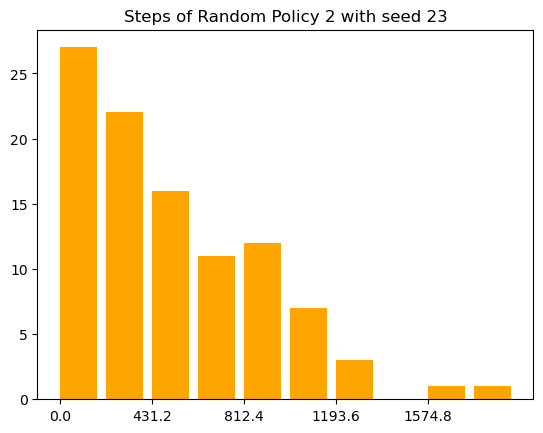

In [16]:
import matplotlib.pyplot as plt
# bar plot of steps
plt.bar(range(len(counts)), counts, align= 'edge', color='orange')
plt.title("Steps of Random Policy 2 with seed 23")
bin_edges.put(0,0)
plt.xticks(ticks=range(0, len(counts)-1, 2),labels= bin_edges[:-1:2] )

([<matplotlib.axis.XTick at 0x289d482ee30>,
 [Text(0, 0, '0.0'),
  Text(3, 0, '0.0305'),
  Text(6, 0, '0.061'),
  Text(9, 0, '0.0915')])

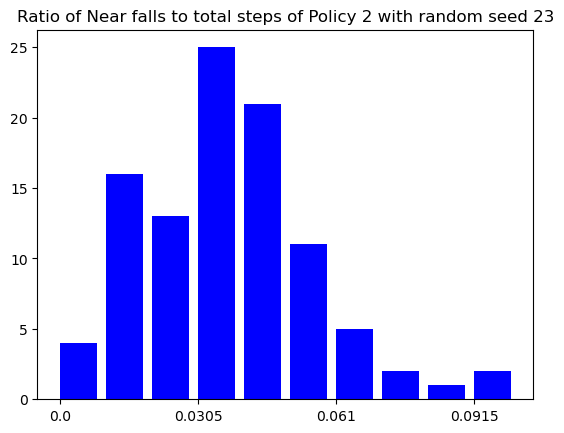

In [17]:
#bar plot of near falls to total steps
ratio_counts, ratio_edges = np.histogram(ratio)
plt.bar(range(len(ratio_counts)), ratio_counts, align= 'edge', color='blue')
plt.title("Ratio of Near falls to total steps of Policy 2 with random seed 23")
plt.xticks(ticks= range(0, len(ratio_edges),3),labels=np.round(ratio_edges[::3], 4))

([<matplotlib.axis.XTick at 0x289d4a19360>,
 [Text(0, 0, '-7698.0'),
  Text(3, 0, '-5411.1'),
  Text(6, 0, '-3124.2'),
  Text(9, 0, '-837.3')])

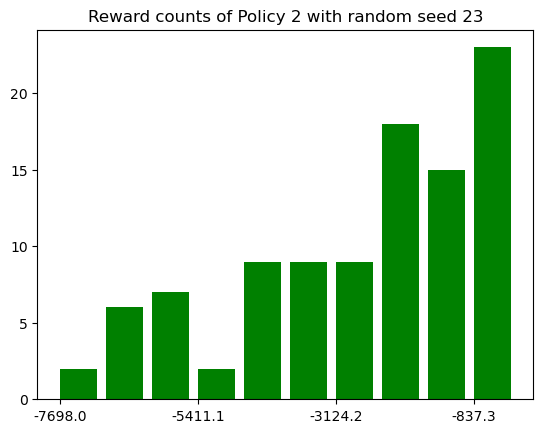

In [18]:
#bar plot of reward counts
reward_counts, reward_edges = np.histogram(rewards_2)
plt.bar(range(len(reward_counts)), reward_counts, align= 'edge', color='green')
plt.title("Reward counts of Policy 2 with random seed 23")
plt.xticks(ticks= range(0, len(reward_edges),3),labels=np.round(reward_edges[::3], 4))

PART 2 POLICY ITERATION

In [19]:
#initialize starting variables for Optimal policy generation by policy iteration

init_pi_s = generate_random_policy(num_actions=nA,num_states=nS)
gamma = 0.8
theta  = 1e-6


In [20]:
# policy evaluation
def pi_eval(pi, env, gamma, theta, nS):
    """
    Evaluate the policy and determine the value of each action in the deterministic policy
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :param: env: The environment
    :param: gamma: the discount rate
    :param: theta: near zero value that will determine exit of evaluation
    :return: Val_state: the evaluation of each state's policy
    """
    Val_state = np.full((nS), 1e-6) 
    Val_new_state = np.full((nS), 1e-6)
    Val_state[nS-1] = 0
    Val_new_state[nS-1]=0
    while True:
        delta = 0
        for state in range(nS-1):
            v = Val_state[state]
            Val_new_state[state] = 1e-6 #setting Val_new_state is necessary or the value will negatively grow to -inf very quickly # 1e-6 is used in case there are any ties
            for prob, next_state, reward, terminated in  env.P[state][pi[state]]: #grab all the possible actions from the policy's desired actions
                Val_new_state[state] += prob * (reward +gamma *Val_state[next_state]) 
            delta = max(delta, abs(v- Val_new_state[state]) )
            Val_state[state] = Val_new_state[state]
        if delta < theta :
            break
    return Val_state

In [21]:
def pi_improve(val_state, env, gamma, nS):
    """
    Produce improved policy given the evaluation of the previous state
    :param: val_state: the given evaluation of each state in the previous policy
    :param: env: The environment
    :param: gamma: the discount rate
    :param: nS: number of states
    :return: new_pi: resulting new policy
    """
    new_pi = np.zeros(nS,dtype=int)
    for state in range(nS-1): #only nS-1 because we do not need to do the end states actions as it is unnecessary and may lead to issues
        Anum = len(env.P[state])
        actions = np.zeros(Anum) #produce an array of values of the possible actions
        for a in range(Anum):
            for prob, next_state, reward, terminated in  env.P[state][a]:
                actions[a] = prob *  (reward + gamma * val_state[next_state]) # calculate the max of each action
        new_pi[state] = np.argmax(actions) # take the argmax action and commit to it
    return new_pi

In [22]:
def pi_iter(pi, gamma, theta, env, nS):
    """
    Policy iteration, by calling policy evaluation and then policy improvment
    :param: pi: Initial given policy, represented as a 1D array of length # of states.
    :param: gamma: the discount rate
    :param: theta: near zero value that will determine exit of evaluation
    :param: env: The environment
    :param: nS: number of states
    :return: pi: resulting new policy
    """
    # I know I did the stable part a little backwards, but doing it this way made more sense to me
    stable = False
    while not stable:
        val_state = pi_eval(pi, env_unwrapped, gamma,  theta, nS)
        new_pi = pi_improve(val_state, env, gamma, nS)
        if (pi == new_pi).all():
            stable = True
        else:
            pi = new_pi
    return pi

In [23]:
pi = pi_iter(init_pi_s, gamma, theta, env_unwrapped, nS)
print ("*** Policy ***\n{}".format(pi.reshape((4, 12))))
#interesting result that all the cliff-side actions are go left, Also 


*** Policy ***
[[0 0 0 0 0 0 0 0 0 0 0 1]
 [3 3 3 3 3 3 3 3 0 0 0 1]
 [3 2 3 0 0 0 0 0 0 0 0 1]
 [3 2 3 3 3 3 3 3 3 3 0 0]]


In [24]:
steps_pi = []
near_falls_pi = []
rewards_pi = []
for trial in range(0,100):
    print(trial)
    outputpi= run(env, pi)
    steps_pi.append(outputpi[0])
    near_falls_pi.append(outputpi[1])
    rewards_pi.append(outputpi[2])

steps_pi_std = np.std(steps_pi)
steps_pi_mean = np.mean(steps_pi)
near_falls_pi_std = np.std(near_falls_pi)
near_falls_pi_mean = np.mean(near_falls_pi)
rewards_pi_std = np.std(rewards_pi)
rewards_pi_mean = np.mean(rewards_pi)
print("Optimal  Policy")
print("Mean steps: " + str(steps_pi_mean))
print("Stdev steps: " + str(steps_pi_std))
print("Mean near_falls: " + str(near_falls_pi_mean))
print("Stdev near_falls: " + str(near_falls_pi_std))
print("Mean reward: " + str(rewards_pi_mean))
print("Stdev reward: " + str(rewards_pi_std))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Optimal  Policy
Mean steps: 217.13
Stdev steps: 155.52894618044576
Mean near_falls: 0.0
Stdev near_falls: 0.0
Mean reward: -217.13
Stdev reward: 155.52894618044576


([<matplotlib.axis.XTick at 0x289d4a84d00>,
 [Text(0, 0, '0.0'),
  Text(2, 0, '295.2'),
  Text(4, 0, '558.4'),
  Text(6, 0, '821.6'),
  Text(8, 0, '1084.8')])

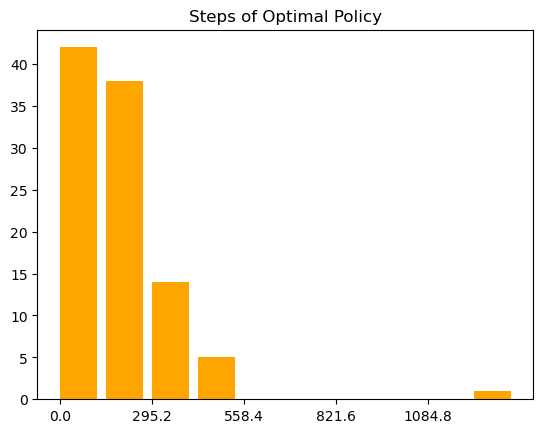

In [25]:
counts_pi, bin_edges_pi = np.histogram(steps_pi)
ratio_pi = np.array(near_falls_pi)/np.array(steps_pi)
plt.bar(range(len(counts_pi)), counts_pi, align= 'edge', color='orange')
plt.title("Steps of Optimal Policy")
bin_edges_pi.put(0,0)
plt.xticks(ticks=range(0, len(counts_pi)-1, 2),labels= np.round(bin_edges_pi[:-1:2] , 4))

([<matplotlib.axis.XTick at 0x289d659ff70>,
 [Text(0, 0, '-0.5'),
  Text(3, 0, '-0.2'),
  Text(6, 0, '0.1'),
  Text(9, 0, '0.4')])

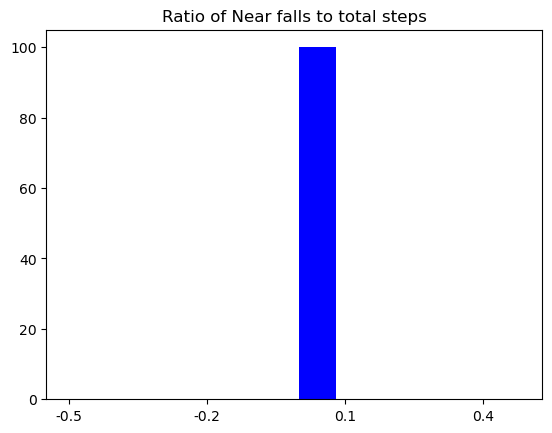

In [26]:
ratio_counts_pi, ratio_edges_pi = np.histogram(ratio_pi)
plt.bar(range(len(ratio_counts_pi)), ratio_counts_pi, align= 'edge', color='blue')
plt.title("Ratio of Near falls to total steps")
plt.xticks(ticks= range(0, len(ratio_edges_pi),3),labels=np.round(ratio_edges_pi[::3], 4))

([<matplotlib.axis.XTick at 0x289d662a290>,
 [Text(0, 0, '-1348.0'),
  Text(3, 0, '-953.2'),
  Text(6, 0, '-558.4'),
  Text(9, 0, '-163.6')])

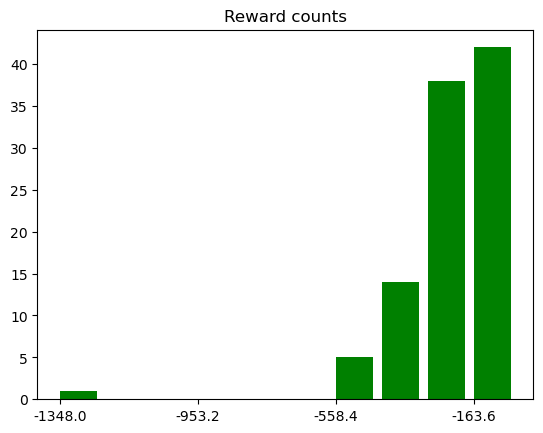

In [27]:
reward_counts_pi, reward_edges_pi = np.histogram(rewards_pi)
plt.bar(range(len(reward_counts_pi)), reward_counts_pi, align= 'edge', color='green')
plt.title("Reward counts")
plt.xticks(ticks= range(0, len(reward_edges_pi),3),labels=np.round(reward_edges_pi[::3], 4))